# **Drought Prediction using CNN+LSTM model**

## What is Drought

Drought is a prolonged dry period in the natural climate cycle that can occur anywhere in the world. It is a slow-onset disaster characterized by the lack of precipitation, resulting in a water shortage. Droughts can last for months or years, and they can have a serious impact on the environment, agriculture, and the economy. Droughts can lead to crop failure, water shortages, and food insecurity, and they can also increase the risk of wildfires and dust storms.

## Why is Drought Prediction Important

Drought prediction is important because it can help us prepare for and mitigate the impacts of droughts. By predicting when and where droughts are likely to occur, we can take steps to reduce their impact on the environment, agriculture, and the economy. For example, we can implement water conservation measures, develop drought-resistant crops, and improve water management practices. Drought prediction can also help us plan for and respond to drought-related emergencies, such as wildfires and food shortages.

## Objective

The objective of this notebook is to predict drought using a Convolutional Neural Network (CNN) and Long Short-Term Memory (LSTM) model. The model will be trained on historical climate data, such as temperature, and precipitation, to predict the likelihood of drought in the future.

## Dataset

The dataset used in this notebook is the actual data of climate change in the Ethiopia region collected from Ethiopian National Meteorological Agency. The dataset contains the following columns:
  
- `YYEAR`: The year of the data.
- `GH_ID`: The geographical ID of the data.
- `GEOGR2`: The geographical longitude of the data point.
- `GEOGR1`: The geographical latitude of the data point.
- `ELEVATION`: The elevation of the data point.
- `Element`: The type of climate data (e.g., temperature, precipitation).
    - `PRECIP`: Precipitation data.
    - `TMPMAX`: Maximum temperature data.
    - `TMPMIN`: Minimum temperature data.
- Monthly climate data from January to December.

### How data is organized

The data is organized in a tabular format, with each row representing a data point for a specific year, geographical location, and climate element. The data is collected from multiple geographical locations in the Ethiopia region. Each row represents the climate data for a specific year, geographical location, and climate element.

#### Sample Data Organization
```
   NAME     GH_ID  GEOGR2  GEOGR1  ELEVATION Element  YEAR   Jan    Feb
 Abomsa  ARABOM11   8.479  39.837     1634.0  PRECIP  2021   0.1   21.1
 Abomsa  ARABOM11   8.479  39.837     1634.0  TMPMAX  2021  27.2   27.7
 Abomsa  ARABOM11   8.479  39.837     1634.0  PRECIP  1990   7.4  347.4
```

## Data Preprocessing

### Data Cleaning

We have performed the following data cleaning steps:

1. Fill the missing geographical data with the mean value. Since the average distance between the geographical points is small, we can fill the missing values with the mean value.
2. Fill the missing elevation data with the actual elevation data using https://www.dcode.fr/earth-elevation API.
3. Fill the missing climate data with the mean value of the respective column. We have verfied the `mean` and `median` values of the respective columns and found that the `mean` value is more appropriate to fill the missing values.
4. Drop the rows with duplicate data.
5. Drop the incomplete years, years with missing Element data.

### Feature Engineering

We have performed the following feature engineering steps:

1. Extract the relevant features for drought prediction, such as geographical location, elevation, and climate data (temperature, and precipitation).
2. Generate a timeseries dataset by combining the monthly climate data for each year with respect to the geographical location and climate element.

sample data after feature engineering:
```csv
   MONTH,YEAR,GH_ID,GEOGR2,GEOGR1,ELEVATION,PERCIPT,TMPMAX,TMPMIN
    Jan,1990,ARABOM11,6.0943055,38.5908335,1634.0,7.4,26.1,13.8
    Feb,1990,ARABOM11,6.0943055,38.5908335,1634.0,347.4,24.8,15.8
    Mar,1990,ARABOM11,6.0943055,38.5908335,1634.0,186.1,24.8,15.8
    Apr,1990,ARABOM11,6.0943055,38.5908335,1634.0,183.5,26.3,16.0
```

## Methodology

The methodology used in this notebook is as follows:

1. Data Preprocessing: The dataset is preprocessed to extract the relevant features and normalize the data.
2. Data Splitting: The dataset is split into training and testing sets.
3. Model Building: A CNN+LSTM model is built using the Keras library.
4. Model Training: The model is trained on the training data.
5. Model Evaluation: The model is evaluated on the testing data.
6. Drought Prediction: The model is used to predict drought in the future.

## Conclusion

In this notebook, we have built a CNN+LSTM model to predict drought using historical climate data. The model has been trained and evaluated on the dataset, and it can be used to predict drought in the future. By predicting drought, we can take steps to prepare for and mitigate the impacts of droughts, and help build a more resilient and sustainable future.

In [4]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
# Importing the dataset
df = pd.read_excel("data.xlsx")

In [4]:
# Display the first 5 rows of the dataset
df.head()

,NAME,GH_ID,GEOGR2,GEOGR1,ELEVATION,Element,YEAR,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Abomsa,ARABOM11,8.479,39.837,1634.0,PRECIP,2021,0.1,21.1,0.3,75.0,NaN,48.4,203.3,172.0,228.2,NaN,24.6,0.0
1,Abomsa,ARABOM11,8.479,39.837,1634.0,TMPMAX,2021,27.2,27.7,31.6,31.4,NaN,31.8,27.4,28.0,27.5,27.6,27.8,27.4
2,Abomsa,ARABOM11,8.479,39.837,1634.0,PRECIP,1990,7.4,347.4,186.1,183.5,NaN,22.0,220.8,115.8,106.9,8.3,3.1,4.0
3,Abomsa,ARABOM11,8.479,39.837,1634.0,PRECIP,1991,2.0,69.6,100.2,45.3,58.3,69.8,171.0,185.1,46.1,21.0,1.1,5.2
4,Abomsa,ARABOM11,8.479,39.837,1634.0,PRECIP,2008,5.4,2.4,1.1,74.6,85.5,42.1,193.9,176.4,102.0,143.1,48.6,0.0


In [5]:
# List the numerical columns in the dataset
data_columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Display the summary statistics of the dataset
df[data_columns].describe()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,5712.000000,5684.000000,5626.000000,5667.000000,5582.000000,5617.000000,5689.000000,5701.000000,5602.000000,5484.000000,5440.000000,5322.000000
mean,18.515879,21.377692,33.630146,48.500141,56.955876,56.537689,83.029162,86.742677,61.841574,42.293399,26.318603,18.203589
std,25.002927,29.414395,40.746319,61.754048,76.319703,80.671746,114.769283,117.461175,80.121593,60.905536,35.406774,20.191251
min,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.200000,-2.100000
25%,7.200000,8.900000,13.700000,15.500000,15.600000,15.000000,15.600000,15.700000,15.000000,12.900000,10.300000,6.500000
50%,14.200000,16.000000,24.700000,26.500000,25.800000,24.300000,23.500000,23.800000,24.900000,22.900000,19.350000,13.900000
75%,26.500000,28.300000,32.500000,41.500000,54.750000,44.400000,117.900000,134.600000,80.425000,33.325000,27.900000,25.700000
max,1083.000000,894.200000,983.200000,731.100000,788.000000,781.500000,876.000000,1082.100000,729.000000,891.000000,1030.500000,306.700000


In [6]:
# Verify if there are any missing values in the dataset
df.isnull().sum()

NAME            0
GH_ID           0
GEOGR2         12
GEOGR1         12
ELEVATION      11
Element         0
YEAR            0
Jan           801
Feb           829
Mar           887
Apr           846
May           931
Jun           896
Jul           824
Aug           812
Sep           911
Oct          1029
Nov          1073
Dec          1191
dtype: int64

### Fill missing values

### Pre-processing georgraphical data

In [7]:
# Display the rows with missing values in the dataset for the column 'GEOGR1'
df[df.GEOGR1.isna()][['GH_ID', 'GEOGR1', 'GEOGR2', 'ELEVATION']]

,GH_ID,GEOGR1,GEOGR2,ELEVATION
3846,SIBORE23,NaN,NaN,2400.0
3847,SIBORE23,NaN,NaN,2400.0
3848,SIBORE23,NaN,NaN,2400.0
3849,SIBORE23,NaN,NaN,2400.0
3850,SIBORE23,NaN,NaN,2400.0
3851,SIBORE23,NaN,NaN,2400.0
4222,SIBORE23,NaN,NaN,2400.0
4223,SIBORE23,NaN,NaN,2400.0
4224,SIBORE23,NaN,NaN,2400.0
4225,SIBORE23,NaN,NaN,2400.0


In [8]:
# Calculate the mean of the 'GEOGR1' column, which is the equi-distant between the two points
# Extract the coordinates for SIBORE14 and SIBORE31
coords_sibore14 = df[df['GH_ID'] == 'SIBORE14'][['GEOGR1', 'GEOGR2']].iloc[0]
coords_sibore31 = df[df['GH_ID'] == 'SIBORE31'][['GEOGR1', 'GEOGR2']].iloc[0]

# Calculate the midpoint
mid_lat = (coords_sibore14['GEOGR1'] + coords_sibore31['GEOGR1']) / 2
mid_lon = (coords_sibore14['GEOGR2'] + coords_sibore31['GEOGR2']) / 2

df[df['GEOGR1'].isna()] = df[df['GEOGR1'].isna()].fillna({'GEOGR1': mid_lat, 'GEOGR2': mid_lon})

In [9]:
df[df['GEOGR1'].isna()].fillna({'GEOGR1': mid_lat, 'GEOGR2': mid_lon})

,NAME,GH_ID,GEOGR2,GEOGR1,ELEVATION,Element,YEAR,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec


### Pre-processing Elevations

In [10]:
# Display the rows with missing values in the dataset for the column 'ELEVATION'
df[['NAME', 'GH_ID', 'GEOGR1', 'GEOGR2', 'ELEVATION']][df.ELEVATION.isna()]

,NAME,GH_ID,GEOGR1,GEOGR2,ELEVATION
2139,Gambela,ILGAMB14,34.58,8.25,NaN
2140,Gambela,ILGAMB14,34.58,8.25,NaN
2141,Gambela,ILGAMB14,34.58,8.25,NaN
6445,Mankush,GOMANK33,35.25,11.28,NaN
6446,Mankush,GOMANK33,35.25,11.28,NaN
6447,Mankush,GOMANK33,35.25,11.28,NaN
6448,Mankush,GOMANK33,35.25,11.28,NaN
6449,Mankush,GOMANK33,35.25,11.28,NaN
6450,Mankush,GOMANK33,35.25,11.28,NaN
6451,Mankush,GOMANK33,35.25,11.28,NaN


In [11]:
# The actual elevation of the missing datas can be determined 
# using https://www.dcode.fr/earth-elevation by providing the geo location data
# The elevation of the missing data is 2380

# Fill the missing values in the 'ELEVATION' column with the actual elevation
df['ELEVATION'].fillna(2380, inplace=True)

### Determine the behaviour of data distribution over different elements

In [12]:
# Split the columns based on the 'Element' column
temp_max = df[df.Element == 'TMPMAX']
temp_min = df[df.Element == 'TMPMIN']
percip = df[df.Element == 'PRECIP']

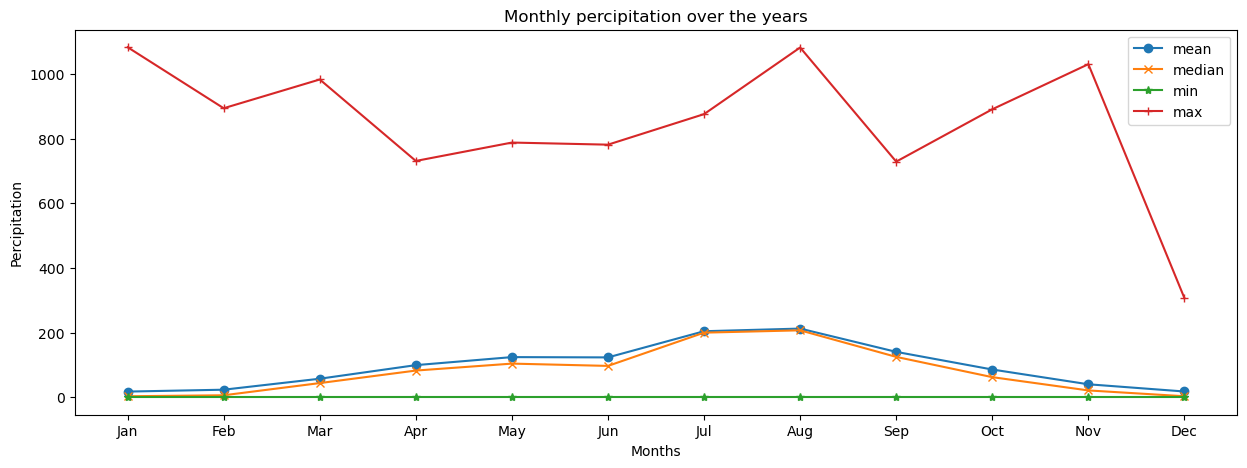

In [13]:
# Plotting the data of monthly percipitation over the years
plt.figure(figsize=(15, 5))
plt.plot(data_columns, percip[data_columns].mean(), marker='o')
plt.plot(data_columns, percip[data_columns].median(), marker='x')
plt.plot(data_columns, percip[data_columns].min(), marker='*')
plt.plot(data_columns, percip[data_columns].max(), marker='+')
plt.title('Monthly percipitation over the years')
plt.legend(['mean', 'median', 'min', 'max'])
plt.xlabel('Months')
plt.ylabel('Percipitation')
plt.show()

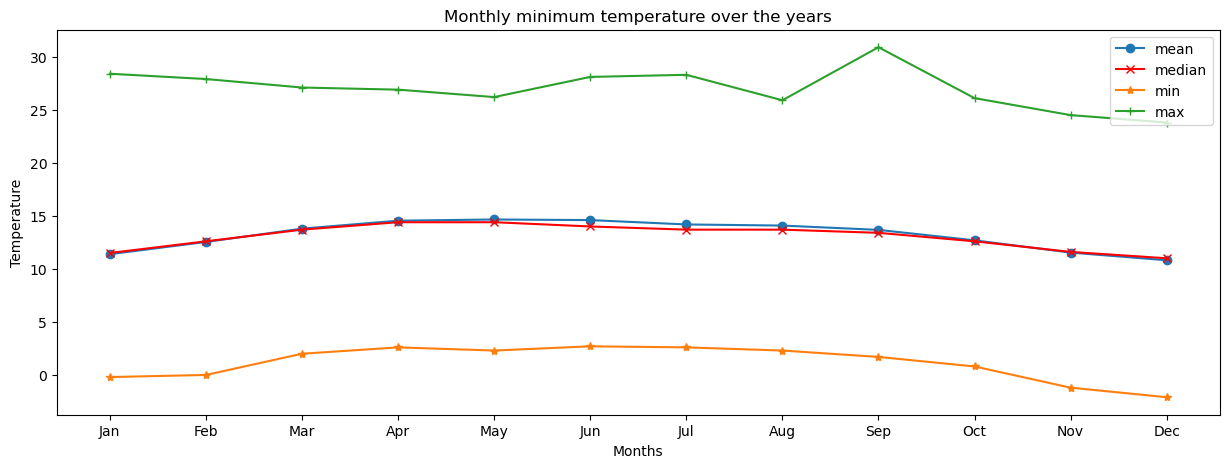

In [14]:
# Plotting the data of monthly minimum temperature over the years
plt.figure(figsize=(15, 5))
plt.plot(data_columns, temp_min[data_columns].mean(), marker='o')
plt.plot(data_columns, temp_min[data_columns].median(), marker='x', color='red')
plt.plot(data_columns, temp_min[data_columns].min(), marker='*')
plt.plot(data_columns, temp_min[data_columns].max(), marker='+')
plt.title('Monthly minimum temperature over the years')
plt.legend(['mean', 'median', 'min', 'max'])
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.show()

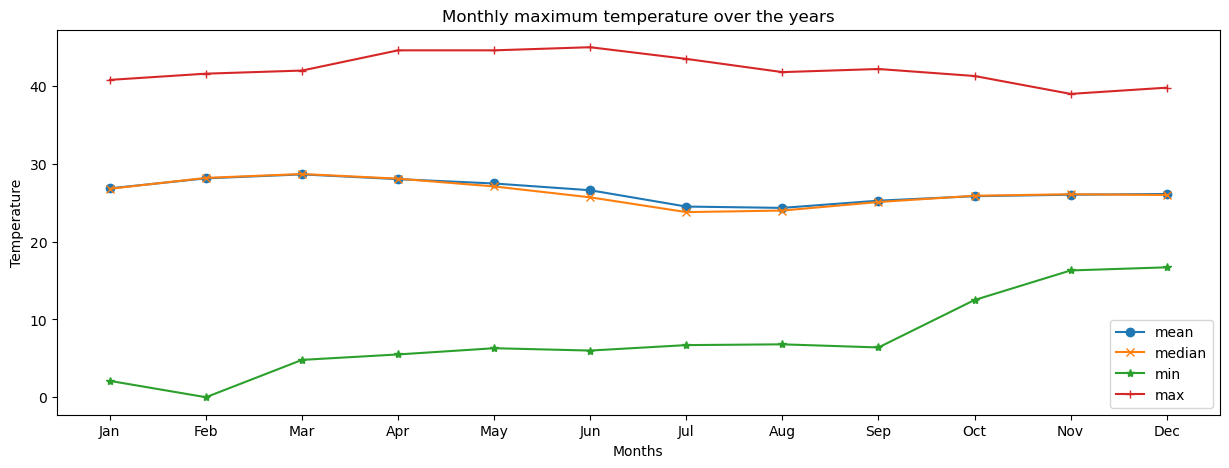

In [15]:
# Plotting the data of monthly minimum temperature over the years
plt.figure(figsize=(15, 5))
plt.plot(data_columns, temp_max[data_columns].mean(), marker='o')
plt.plot(data_columns, temp_max[data_columns].median(), marker='x')
plt.plot(data_columns, temp_max[data_columns].min(), marker='*')
plt.plot(data_columns, temp_max[data_columns].max(), marker='+')
plt.title('Monthly maximum temperature over the years')
plt.legend(['mean', 'median', 'min', 'max'])
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.show()

/tmp/ipykernel_250386/437447379.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 4, i+1)


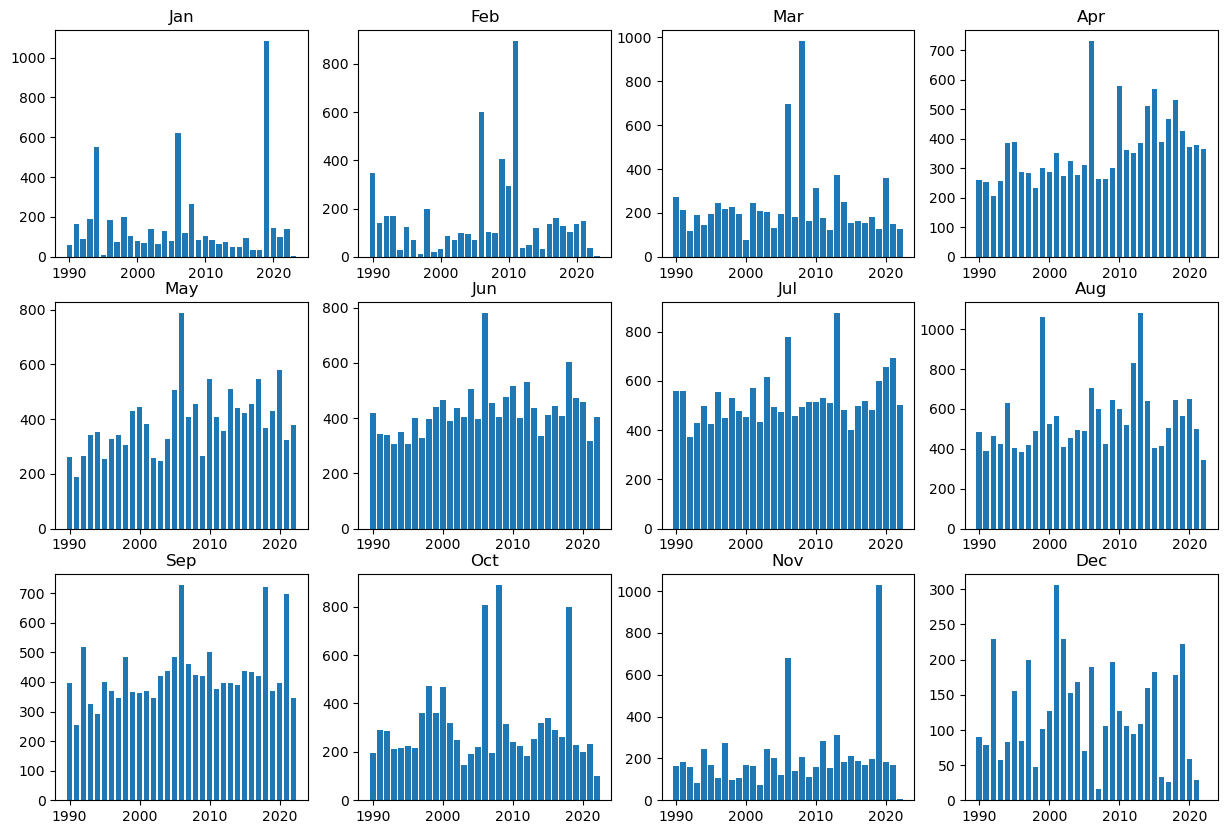

In [16]:
# Plot the percipitation data of all monthes over the years in a subplots
plt.figure(figsize=(15, 10))
plt.title('Percipitation over the years')
for i, month in enumerate(data_columns):
    plt.subplot(3, 4, i+1)
    plt.bar(percip['YEAR'], percip[month])
    plt.title(month)
plt.show()

In [17]:
# Fill the missing values in the columns with the mean of the column
for column in data_columns:
    temp_max[column] = temp_max.groupby(['GH_ID'])[column].transform(lambda x: x.fillna(x.mean()))
    temp_min[column] = temp_min.groupby(['GH_ID'])[column].transform(lambda x: x.fillna(x.mean()))
    percip[column] = percip.groupby(['GH_ID'])[column].transform(lambda x: x.fillna(x.mean()))

/tmp/ipykernel_250386/1656493430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_max[column] = temp_max.groupby(['GH_ID'])[column].transform(lambda x: x.fillna(x.mean()))
/tmp/ipykernel_250386/1656493430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_min[column] = temp_min.groupby(['GH_ID'])[column].transform(lambda x: x.fillna(x.mean()))
/tmp/ipykernel_250386/1656493430.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [18]:
temp_max.isna().sum()

NAME         0
GH_ID        0
GEOGR2       0
GEOGR1       0
ELEVATION    0
Element      0
YEAR         0
Jan          0
Feb          2
Mar          2
Apr          2
May          2
Jun          2
Jul          2
Aug          2
Sep          2
Oct          0
Nov          0
Dec          0
dtype: int64

In [19]:
# Concatenate the dataframes
proDf = pd.concat([percip, temp_max, temp_min], axis=0)
proDf.shape, proDf.head()

((6513, 19),
      NAME     GH_ID  GEOGR2  GEOGR1  ELEVATION Element  YEAR   Jan    Feb  \
 0  Abomsa  ARABOM11   8.479  39.837     1634.0  PRECIP  2021   0.1   21.1   
 2  Abomsa  ARABOM11   8.479  39.837     1634.0  PRECIP  1990   7.4  347.4   
 3  Abomsa  ARABOM11   8.479  39.837     1634.0  PRECIP  1991   2.0   69.6   
 4  Abomsa  ARABOM11   8.479  39.837     1634.0  PRECIP  2008   5.4    2.4   
 5  Abomsa  ARABOM11   8.479  39.837     1634.0  PRECIP  2009  67.7    0.0   
 
      Mar    Apr        May   Jun    Jul    Aug    Sep         Oct   Nov  Dec  
 0    0.3   75.0  73.756667  48.4  203.3  172.0  228.2   62.573333  24.6  0.0  
 2  186.1  183.5  73.756667  22.0  220.8  115.8  106.9    8.300000   3.1  4.0  
 3  100.2   45.3  58.300000  69.8  171.0  185.1   46.1   21.000000   1.1  5.2  
 4    1.1   74.6  85.500000  42.1  193.9  176.4  102.0  143.100000  48.6  0.0  
 5   49.3   56.3  28.700000  22.4  147.8  181.9   54.5  165.000000  14.5  5.2  )

# Remove duplicates

In [20]:
df_droped = proDf.drop_duplicates(keep='first')
df_droped.reset_index(inplace=True)
df_droped.shape

(6137, 20)

# Drop inclomplete group

In [21]:
df_groups = df_droped.groupby(['YEAR', 'GH_ID', 'GEOGR2', 'GEOGR1', 'ELEVATION']).groups
incomplete_years = []

for idx in [k for k, v in df_groups.items() if len(v) != 3]:
    incomplete_years.extend(df_groups[idx].to_flat_index())

df_droped.drop(index=incomplete_years, axis=0, inplace=True)
df_groups = df_droped.groupby(['YEAR', 'GH_ID', 'GEOGR2', 'GEOGR1', 'ELEVATION']).groups

/tmp/ipykernel_250386/1058756978.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_droped.drop(index=incomplete_years, axis=0, inplace=True)


In [22]:
df_droped

,index,NAME,GH_ID,GEOGR2,GEOGR1,ELEVATION,Element,YEAR,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,Abomsa,ARABOM11,8.479,39.837,1634.0,PRECIP,2021,0.100000,21.100000,0.300000,75.000000,73.756667,48.40,203.300000,172.000000,228.200,62.573333,24.600000,0.000000
1,2,Abomsa,ARABOM11,8.479,39.837,1634.0,PRECIP,1990,7.400000,347.400000,186.100000,183.500000,73.756667,22.00,220.800000,115.800000,106.900,8.300000,3.100000,4.000000
2,3,Abomsa,ARABOM11,8.479,39.837,1634.0,PRECIP,1991,2.000000,69.600000,100.200000,45.300000,58.300000,69.80,171.000000,185.100000,46.100,21.000000,1.100000,5.200000
3,4,Abomsa,ARABOM11,8.479,39.837,1634.0,PRECIP,2008,5.400000,2.400000,1.100000,74.600000,85.500000,42.10,193.900000,176.400000,102.000,143.100000,48.600000,0.000000
4,5,Abomsa,ARABOM11,8.479,39.837,1634.0,PRECIP,2009,67.700000,0.000000,49.300000,56.300000,28.700000,22.40,147.800000,181.900000,54.500,165.000000,14.500000,5.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,6483,Mankush,GOMANK41,11.272,35.291,860.0,TMPMIN,2016,19.100000,22.500000,25.900000,26.400000,23.000000,21.50,19.700000,19.800000,20.300,20.200000,18.700000,18.333333
6133,6485,Mankush,GOMANK41,11.272,35.291,860.0,TMPMIN,2017,21.300000,21.400000,24.400000,25.500000,23.469231,21.70,19.758824,18.888889,20.100,20.400000,19.100000,18.333333
6134,6488,Mankush,GOMANK41,11.272,35.291,860.0,TMPMIN,2018,19.500000,24.000000,24.000000,25.100000,23.400000,20.60,20.200000,19.800000,20.000,20.300000,19.800000,15.500000
6135,6489,Mankush,GOMANK41,11.272,35.291,860.0,TMPMIN,2019,21.700000,23.300000,24.600000,25.073333,23.469231,20.95,19.758824,19.900000,18.875,18.717647,18.166667,18.333333


## Convert to timeseries data

In [23]:
rows = []
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for key, val in df_groups.items():
    info = [None, None, None]
    for it in val:
        r = df_droped.loc[it]
        if r.Element == 'PRECIP':
            info[0] = r[months]
        elif r.Element == "TMPMAX":
            info[1] = r[months]
        else:
            info[2] = r[months]
    try:
        for month in months:
            rows.append([month, *key, *[i[month] for i in info]])
    except AttributeError:
        print(info)
rows[:5]

[['Jan', 1990, 'ARABOM11', 8.479, 39.837, 1634.0, 7.4, 26.1, 13.8],
 ['Feb', 1990, 'ARABOM11', 8.479, 39.837, 1634.0, 347.4, 24.8, 15.8],
 ['Mar', 1990, 'ARABOM11', 8.479, 39.837, 1634.0, 186.1, 24.8, 15.8],
 ['Apr', 1990, 'ARABOM11', 8.479, 39.837, 1634.0, 183.5, 26.3, 16.0],
 ['May',
  1990,
  'ARABOM11',
  8.479,
  39.837,
  1634.0,
  73.75666666666666,
  30.1,
  17.5]]

In [24]:
# New dataframe with the columns
columns = ['MONTH', 'YEAR', 'GH_ID', 'GEOGR2', 'GEOGR1', 'ELEVATION', 'PERCIPT', 'TMPMAX', 'TMPMIN']
timeDf = pd.DataFrame(rows, columns=columns)
timeDf.head()

,MONTH,YEAR,GH_ID,GEOGR2,GEOGR1,ELEVATION,PERCIPT,TMPMAX,TMPMIN
0,Jan,1990,ARABOM11,8.479,39.837,1634.0,7.400000,26.1,13.8
1,Feb,1990,ARABOM11,8.479,39.837,1634.0,347.400000,24.8,15.8
2,Mar,1990,ARABOM11,8.479,39.837,1634.0,186.100000,24.8,15.8
3,Apr,1990,ARABOM11,8.479,39.837,1634.0,183.500000,26.3,16.0
4,May,1990,ARABOM11,8.479,39.837,1634.0,73.756667,30.1,17.5


### Data Preparation

In [25]:
timeDf['DATE'] = timeDf['YEAR'].astype(str) + '-' + timeDf['MONTH']
timeDf['DATE'] = pd.to_datetime(timeDf['DATE'], format='%Y-%b')

# Set the DATE as the index
timeDf.set_index('DATE', inplace=True)

# Select the TMPMAX column for forecasting
time_series = timeDf['PERCIPT']

# Display the first few rows to confirm the changes
time_series.head()

DATE
1990-01-01      7.400000
1990-02-01    347.400000
1990-03-01    186.100000
1990-04-01    183.500000
1990-05-01     73.756667
Name: PERCIPT, dtype: float64

In [26]:
timeDf.drop(["MONTH", "YEAR"], axis=1, inplace=True)

In [27]:
timeDf.head()

,GH_ID,GEOGR2,GEOGR1,ELEVATION,PERCIPT,TMPMAX,TMPMIN
DATE,,,,,,,
1990-01-01,ARABOM11,8.479,39.837,1634.0,7.400000,26.1,13.8
1990-02-01,ARABOM11,8.479,39.837,1634.0,347.400000,24.8,15.8
1990-03-01,ARABOM11,8.479,39.837,1634.0,186.100000,24.8,15.8
1990-04-01,ARABOM11,8.479,39.837,1634.0,183.500000,26.3,16.0
1990-05-01,ARABOM11,8.479,39.837,1634.0,73.756667,30.1,17.5


In [28]:
timeDf.sort_values('DATE', inplace=True)

In [29]:
timeDf

,GH_ID,GEOGR2,GEOGR1,ELEVATION,PERCIPT,TMPMAX,TMPMIN
DATE,,,,,,,
1990-01-01,ARABOM11,8.479000,39.837000,1634.0,7.400000,26.100000,13.800000
1990-01-01,WOCOMB32,11.083899,39.717633,1857.0,20.900000,23.600000,10.800000
1990-01-01,BAGINI31,7.133333,40.706944,1941.0,5.900000,23.600000,11.900000
1990-01-01,SHEJAJ31,8.991000,37.325000,1732.0,13.753125,30.255556,12.442308
1990-01-01,SHDEBR11,9.670278,39.513056,3206.0,0.000000,19.000000,3.100000
...,...,...,...,...,...,...,...
2023-08-01,SHADDI21,9.018910,38.747500,2386.0,289.966667,20.942424,11.803030
2023-09-01,SHADDI21,9.018910,38.747500,2386.0,184.037500,22.081818,11.475758
2023-10-01,SHADDI21,9.018910,38.747500,2386.0,34.834375,23.403125,10.487500


In [40]:
# Drop groups with less than 60 months
timeDf = timeDf.groupby('GH_ID').filter(lambda x: len(x) >= (15 * 12))

In [42]:
len([len(g) for _, g in timeDf.groupby('GH_ID')])

69

In [43]:
timeDf.to_csv('timeseries_normal.csv')

# **Thank You!**